In [41]:
#import dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
%matplotlib inline

In [2]:
# Read the CSV file into a Pandas DataFrame
cvd_df=pd.read_csv("Framingham_clean.csv")

# Review the DataFrame
cvd_df.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [3]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex_Male                    3658 non-null   int64  
 1   Age                         3658 non-null   int64  
 2   Education                   3658 non-null   int64  
 3   Current_Smoker              3658 non-null   int64  
 4   Cigarettes_Per_Day          3658 non-null   int64  
 5   Blood_Pressure_Medications  3658 non-null   int64  
 6   Prevalent_Stroke            3658 non-null   int64  
 7   Prevalent_Hypertension      3658 non-null   int64  
 8   Diabetes                    3658 non-null   int64  
 9   Total_Cholesterol           3658 non-null   int64  
 10  Systolic_Blood_Pressure     3658 non-null   float64
 11  Diastolic_Blood_Pressure    3658 non-null   float64
 12  BMI                         3658 non-null   float64
 13  Heart_Rate                  3658 

In [4]:
cvd_df.isnull().sum()

Sex_Male                      0
Age                           0
Education                     0
Current_Smoker                0
Cigarettes_Per_Day            0
Blood_Pressure_Medications    0
Prevalent_Stroke              0
Prevalent_Hypertension        0
Diabetes                      0
Total_Cholesterol             0
Systolic_Blood_Pressure       0
Diastolic_Blood_Pressure      0
BMI                           0
Heart_Rate                    0
Glucose                       0
TenYearCHD                    0
dtype: int64

In [5]:
cvd_df.shape

(3658, 16)

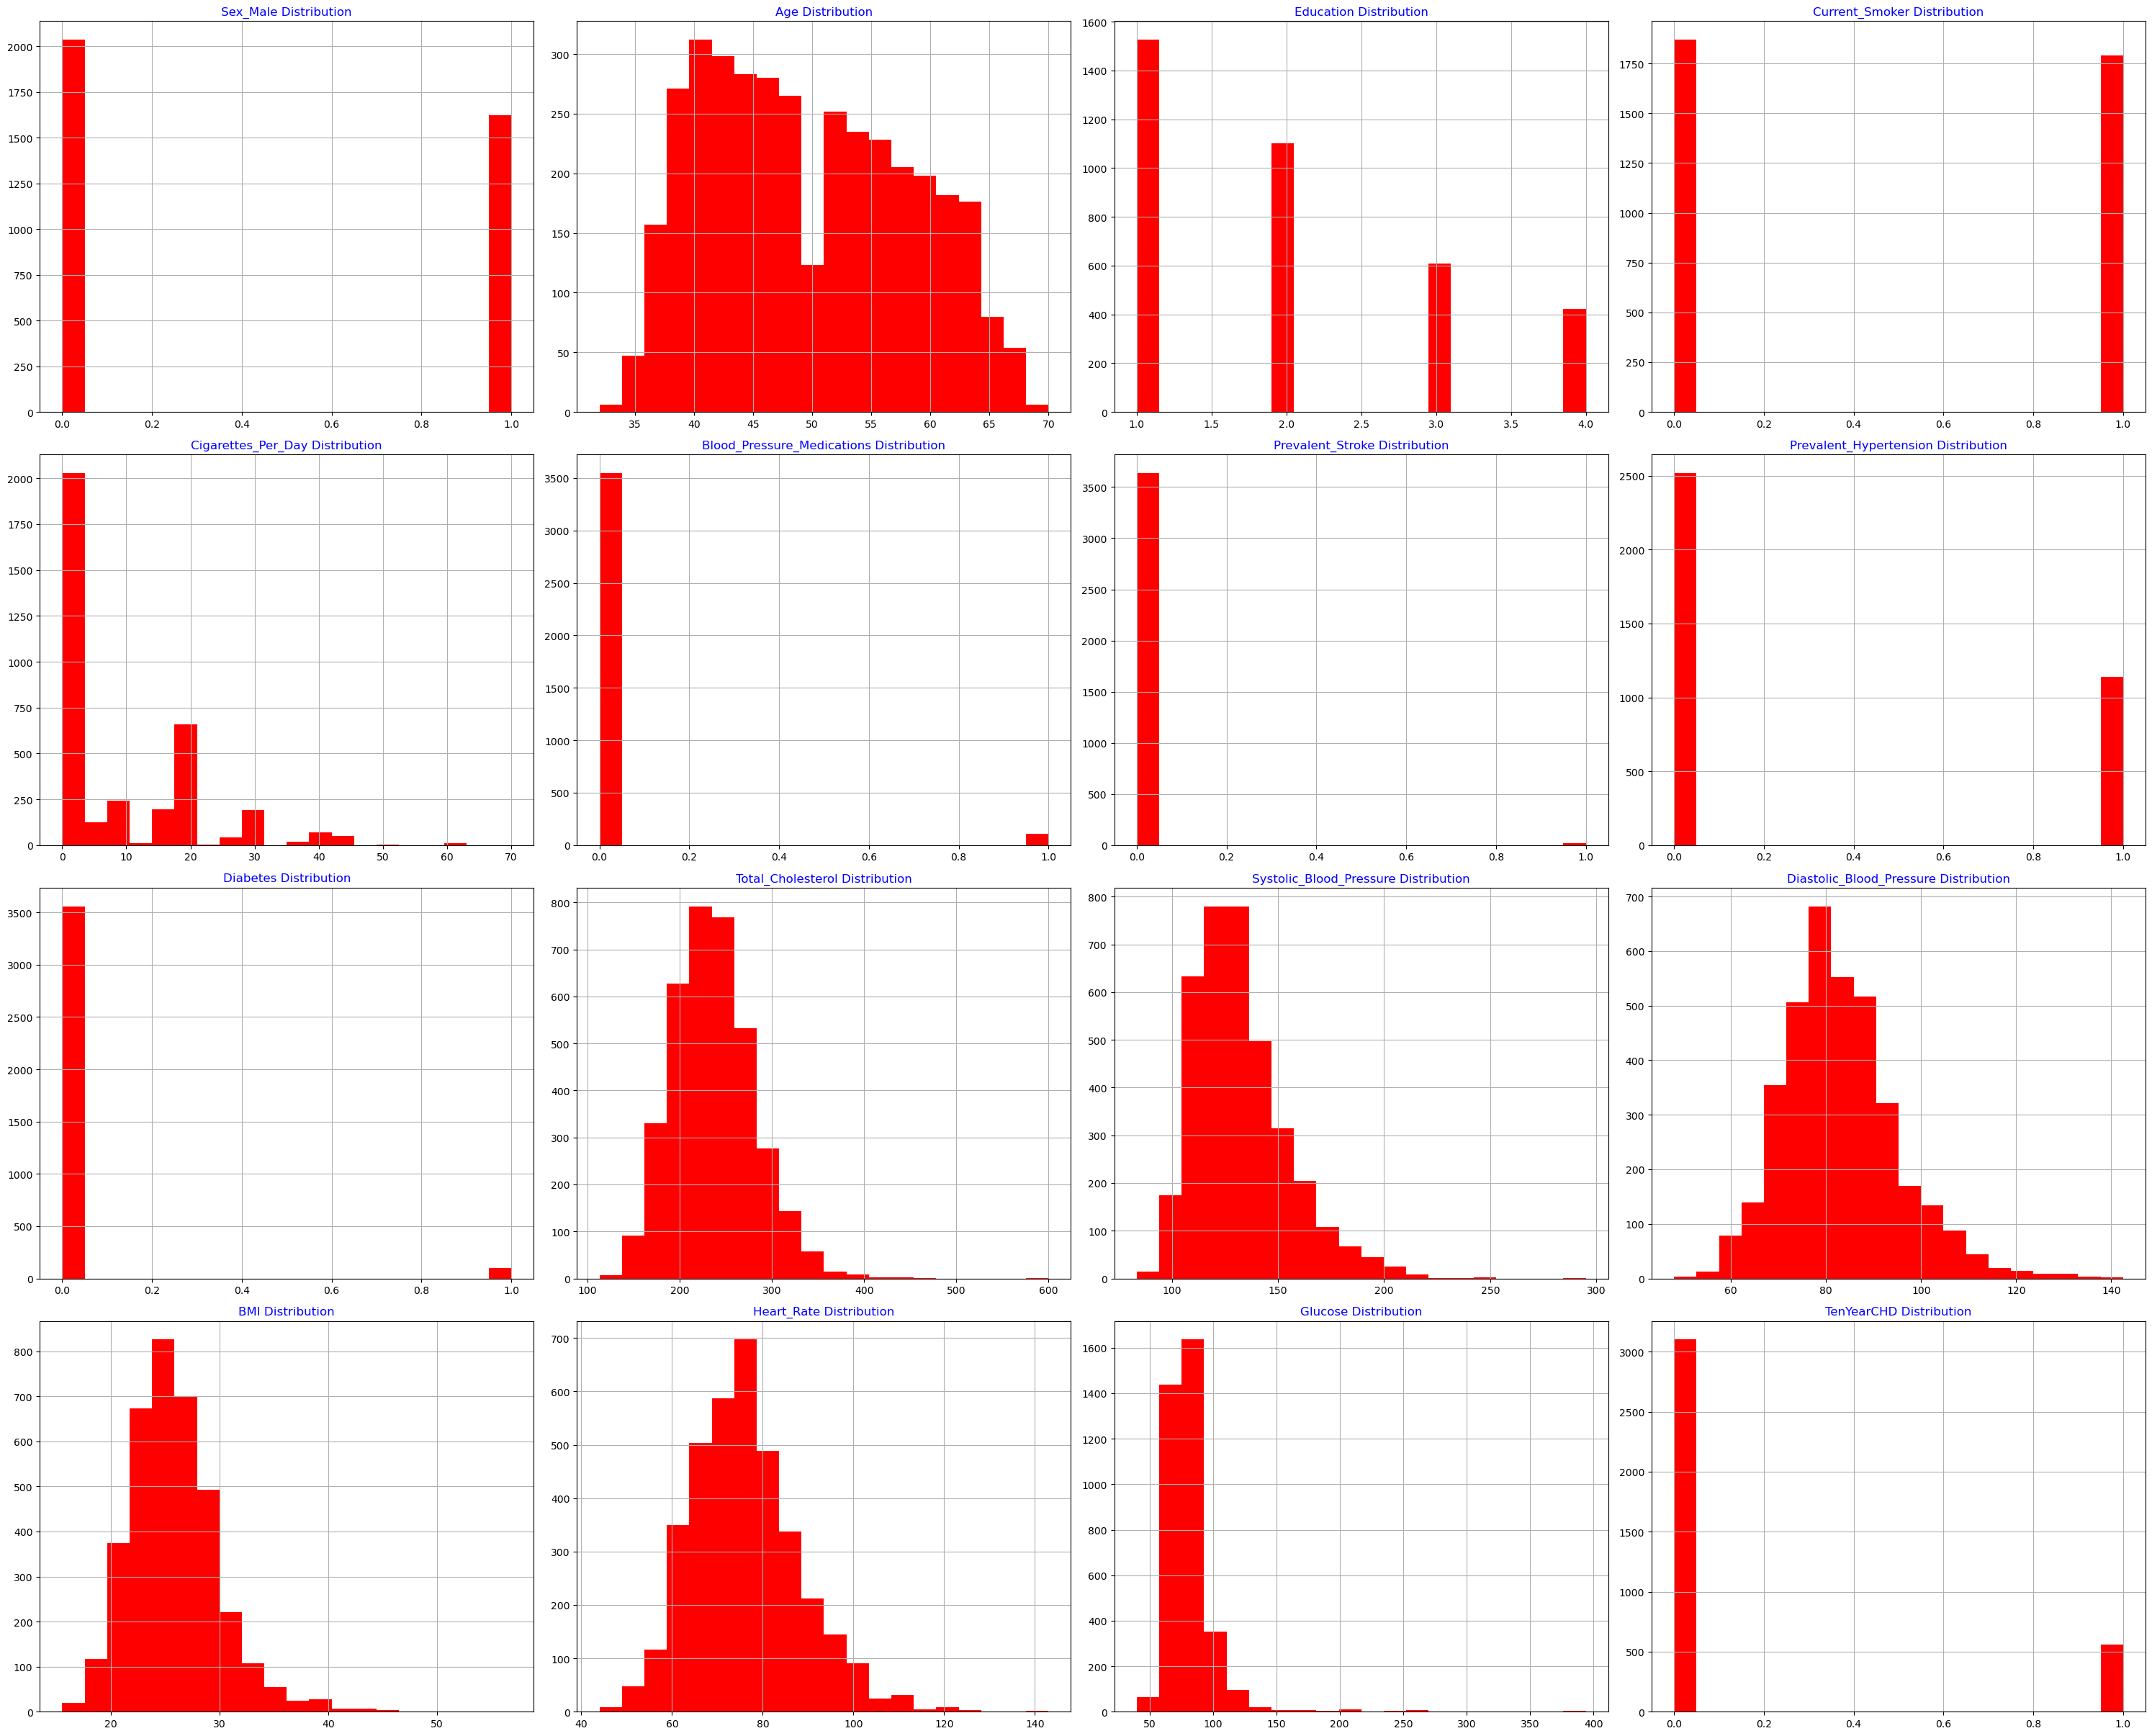

In [10]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+" Distribution",color='blue')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(cvd_df,cvd_df.columns,5,4)

In [55]:
# Calculate the number of CHD cases (Yes/NO)
chd_total = cvd_df.TenYearCHD.value_counts()
chd_df = pd.DataFrame(chd_total)
chd_df.head()

,TenYearCHD
0,3101
1,557


In [54]:
# plot the bar chart for TenYearCHD using plotly with size 20 x 20

chd_bar = px.bar(chd_df, x='TenYearCHD', y='TenYearCHD',  color='TenYearCHD', title='CHD Cases (Yes/No)')
chd_bar.show()


In [57]:
cvd_df_pair = cvd_df[['Sex_Male', 'Age', 'Education', 'Current_Smoker', 'Cigarettes_Per_Day',
       'Blood_Pressure_Medications', 'Prevalent_Stroke',
       'Prevalent_Hypertension', 'Diabetes', 'Total_Cholesterol',
       'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'BMI',
       'Heart_Rate', 'Glucose', 'TenYearCHD']]

Index(['Sex_Male', 'Age', 'Education', 'Current_Smoker', 'Cigarettes_Per_Day',
       'Blood_Pressure_Medications', 'Prevalent_Stroke',
       'Prevalent_Hypertension', 'Diabetes', 'Total_Cholesterol',
       'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'BMI',
       'Heart_Rate', 'Glucose', 'TenYearCHD'],
      dtype='object')

In [62]:
sn.pairplot(cvd_df['Sex_Male', 'Age', 'Education', 'Current_Smoker', 'Cigarettes_Per_Day',
       'Blood_Pressure_Medications', 'Prevalent_Stroke',
       'Prevalent_Hypertension', 'Diabetes', 'Total_Cholesterol',
       'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'BMI',
       'Heart_Rate', 'Glucose', 'TenYearCHD'])

KeyError: ('Sex_Male', 'Age', 'Education', 'Current_Smoker', 'Cigarettes_Per_Day', 'Blood_Pressure_Medications', 'Prevalent_Stroke', 'Prevalent_Hypertension', 'Diabetes', 'Total_Cholesterol', 'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'BMI', 'Heart_Rate', 'Glucose', 'TenYearCHD')

In [33]:
cvd_df.describe()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [34]:
from statsmodels.tools import add_constant as add_constant
cvd_df_constant = add_constant(cvd_df)
cvd_df_constant.head()

,const,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
0,1.0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,1.0,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1.0,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,1.0,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,1.0,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [35]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=cvd_df_constant.columns[:-1]
model=sm.Logit(cvd_df.TenYearCHD,cvd_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.1175
Time:                        22:33:04   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -8.3282      0.715    -11.640      0.000      -9.730      -6.926
Sex_Male                       0.5553      0.109      5.093      0.000       0.342       0.769
Age                            0.0635      0.007      9.509      0.000       0.050       0.077
Education                     -0.0478      0.049     -0.967      0.334      -0.145       0.049
Current_Smoker                 0.0716      0.157      0.457      0.648      -0.236       0.379
Cigarettes_Per_Day             0.0179      0.006      2.872      0.004       0.006       0.030
Blood_Pressure_Medications     0.1625      0.234      0.693      0.488      -0.297       0.622
Prevalent_Stroke               0.6937      0.490      1.417      0.157      -0.266       1.653
Prevalent_Hypertension         0.2342      0.138      1.697      0.090      -0.036       0.505
Diabetes                       0.0392      0.316      0.124      0.901      -0.579       0.658
Total_Cholesterol              0.0023      0.001      2.070      0.038       0.000       0.005
Systolic_Blood_Pressure        0.0154      0.004      4.044      0.000       0.008       0.023
Diastolic_Blood_Pressure      -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                            0.0067      0.013      0.523      0.601      -0.018       0.032
Heart_Rate                    -0.0032      0.004     -0.771      0.441      -0.012       0.005
Glucose                        0.0071      0.002      3.190      0.001       0.003       0.012
==============================================================================================
"""

In [36]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating the feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(cvd_df_constant,cvd_df.TenYearCHD,cols)

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.1148
Time:                        22:33:17   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.408e-74
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -9.1353      0.475    -19.213      0.000     -10.067      -8.203
Sex_Male                    0.5617      0.107      5.258      0.000       0.352       0.771
Age                         0.0660      0.006     10.267      0.000       0.053       0.079
Cigarettes_Per_Day          0.0192      0.004      4.606      0.000       0.011       0.027
Total_Cholesterol           0.0023      0.001      2.031      0.042    8.01e-05       0.004
Systolic_Blood_Pressure     0.0175      0.002      8.155      0.000       0.013       0.022
Glucose                     0.0073      0.002      4.343      0.000       0.004       0.011
===========================================================================================
"""

In [38]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                         CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                        0.000042       0.000274    0.000108   0.000
Sex_Male                     1.422325       2.161998    1.753586   0.000
Age                          1.054823       1.081727    1.068190   0.000
Cigarettes_Per_Day           1.011106       1.027788    1.019413   0.000
Total_Cholesterol            1.000080       1.004491    1.002283   0.042
Systolic_Blood_Pressure      1.013404       1.021977    1.017682   0.000
Glucose                      1.004004       1.010626    1.007310   0.000


In [ ]:
import sklearn
new_features=cvd_df[['Age','Sex_Male','Cigarettes_Per_Day','Total_Cholesterol','Systolic_Blood_Pressure','Glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

In [ ]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

In [ ]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])